In [9]:
import WrightTools as wt
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from scipy.stats import skew

In [10]:
foldname = '2023-06-05 48057 grid_scan_wp mono rdc broadband resonant scan d2 off delays. twin1 off resonant cf32f7b9'
data = wt.open('C:\\Users\\peter\\Documents\\Broadband Sample Output Waldo\\'+foldname+'\\primary.wt5')

In [11]:
#data.print_tree()

primary (C:\Users\peter\AppData\Local\Temp\esnqxf8q.wt5)
├── axes
│   └── 0: mono (wn) (121,)
├── constants
├── variables
│   ├── 0: labtime (s) (121,)
│   ├── 1: hp (nm) (121,)
│   ├── 2: hp_destination (nm) (121,)
│   ├── 3: hp_Delay_1 (mm) (121,)
│   ├── 4: hp_Delay_1_destination (mm) (121,)
│   ├── 5: hp_Crystal_1 (deg) (121,)
│   ├── 6: hp_Crystal_1_destination (deg) (121,)
│   ├── 7: hp_Delay_2 (deg) (121,)
│   ├── 8: hp_Delay_2_destination (deg) (121,)
│   ├── 9: hp_Crystal_2 (deg) (121,)
│   ├── 10: hp_Crystal_2_destination (deg) (121,)
│   ├── 11: hp_SHG_Crystal (deg) (121,)
│   ├── 12: hp_SHG_Crystal_destination (deg) (121,)
│   ├── 13: hp_RP5_Stage (mm) (121,)
│   ├── 14: hp_RP5_Stage_destination (mm) (121,)
│   ├── 15: hp_WS_Wheel_1 (deg) (121,)
│   ├── 16: hp_WS_Wheel_1_destination (deg) (121,)
│   ├── 17: hp_RP6_Stage (deg) (121,)
│   ├── 18: hp_RP6_Stage_destination (deg) (121,)
│   ├── 19: hp_Crystal_Stage_2 (deg) (121,)
│   ├── 20: hp_Crystal_Stage_2_destination (deg) 

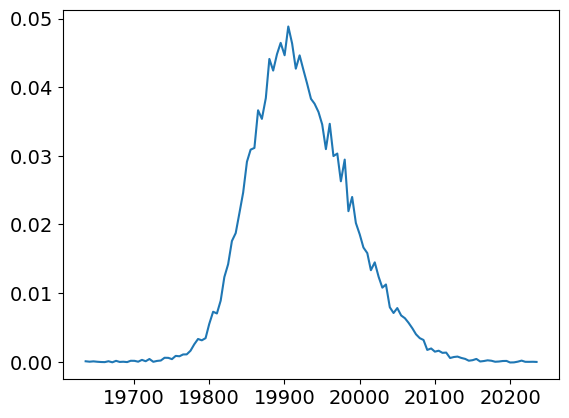

In [14]:
def fit(data, func):
    data.print_tree()
    n_attempts = 0
    while n_attempts<5:
        try:
            x_ind = input("Enter axis index: ")
            x = data.axes[int(x_ind)].full
            n_attempts=0
            break
        except:
            print('Not found, try again!')
            n_attempts+=1
            
    while n_attempts<5:
        try:
            y_ind = input("Enter channel index: ")
            y = data.channels[int(y_ind)].full
            n_attempts=0
            break
        except:
            print('Not found, try again!')
            n_attempts+=1
            
    plt.plot(x, y)
    plt.show()

fit(data, _)

1.0698202137382458


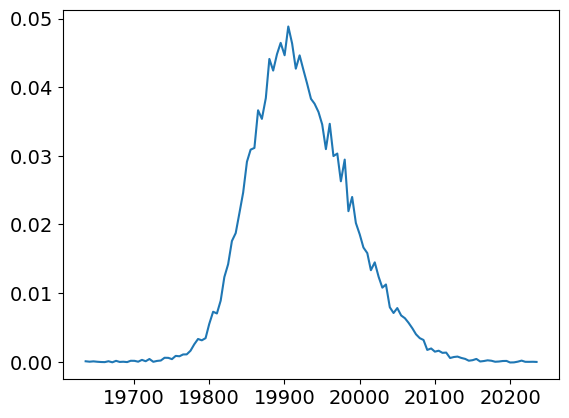

In [17]:
x = data.axes[0].full
y = data.channels[8].full
print(skew(np.flip(y)))
plt.plot(x, y)
plt.show()

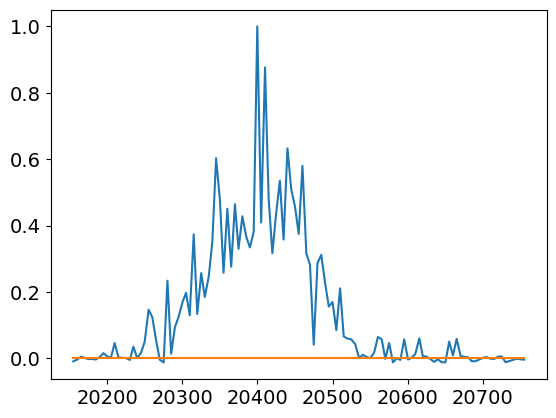

In [7]:
def wt_gauss(p, x):
    def wrapper():
        return partial(wt.kit.gaussian, x)
    return wrapper()(*p)
wt_fit = wt.kit.leastsqfitter


fit_params = wt_fit((19918, 108), x, y/max(y), wt_gauss)[0]
plt.plot(x, y/max(y))
plt.plot(x, [wt_gauss(fit_params, i) for i in x])